In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("salary_data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


SINCE OUR DATA IS SORTED (YEARS EXPERIENCE) SO WE NEED TO SHUFFLE IT 

In [5]:
# data = data.sample(frac = 1)

In [6]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


SPLITTING THE DATA 

TRAINING DATA

In [7]:
data_train  = data.iloc[0 : 20 , [0 , 1]]

data_train.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


TEST DATA

In [8]:
data_test = data.iloc[20 : ]

In [9]:
data_test

,YearsExperience,Salary
20,6.8,91738
21,7.1,98273
22,7.9,101302
23,8.2,113812
24,8.7,109431
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


ADDING ADDITIONAL COLUMNS REQUIRED FOR CALCULATING THE SLOPE AND INTERCEPT

In [10]:
data_train['(YearsExperience)^2'] = data_train['YearsExperience']**2

data_train['(Salary)^2'] = data_train['Salary']**2

data_train['YE * Salary'] = data_train['YearsExperience'] * data_train['Salary']

In [11]:
data_train.head()

,YearsExperience,Salary,(YearsExperience)^2,(Salary)^2,YE * Salary
0,1.1,39343,1.21,1547871649,43277.3
1,1.3,46205,1.69,2134902025,60066.5
2,1.5,37731,2.25,1423628361,56596.5
3,2.0,43525,4.00,1894425625,87050.0
4,2.2,39891,4.84,1591291881,87760.2


REQUIREMENTS FOR THE SLOPE AND INTERCEPT

In [12]:
A = data_train['YearsExperience'].sum()

B = data_train['Salary'].sum()

In [13]:
x = data_train['(YearsExperience)^2'] .sum()

y = data_train['(Salary)^2'].sum()

z = data_train['YE * Salary'].sum()

SLOPE AND INTERCEPT

In [14]:
slope = ((20*z) - (A*B)) / ((20 * x) - (A*A))

intercept = ((B*x) - (A*z)) / ((20*x) - (A*A))

print('SLOPE : ' , slope , 'INTERCEPT : ' , intercept)

SLOPE :  9116.114200692717 INTERCEPT :  26577.400019513167


MAKING PREDICTION FOR THE TEST DATA 

In [15]:
data_test['Predicted Values'] = (slope * data_test['YearsExperience'] + intercept)

data_test

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YearsExperience,Salary,Predicted Values
20,6.8,91738,88566.976584
21,7.1,98273,91301.810844
22,7.9,101302,98594.702205
23,8.2,113812,101329.536465
24,8.7,109431,105887.593566
25,9.0,105582,108622.427826
26,9.5,116969,113180.484926
27,9.6,112635,114092.096346
28,10.3,122391,120473.376287
29,10.5,121872,122296.599127


PLOTTING THE DATA

Text(0.5, 0, 'SALARY')

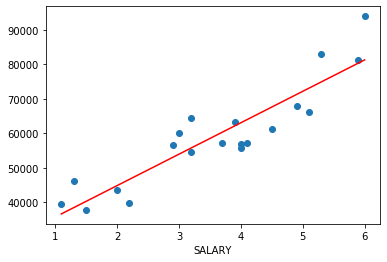

In [16]:
import matplotlib.pyplot as plt  

plt.scatter(data_train["YearsExperience"] , data_train["Salary"])
plt.plot(data_train["YearsExperience"] , slope * data_train["YearsExperience"] + intercept , '-r')

plt.xlabel("YEARS")
plt.xlabel("SALARY")

In [17]:
# data_test.plot(x = 'YearsExperience' , y = 'Salary' , style = 'o')

# data_test.plot(x = 'YearsExperience' , y = 'Predicted Values' , style = '-')

# plt.title('GRAPH') 

# plt.xlabel('YEARS(EXPERIENCE)')  

# plt.ylabel('SALARY')  

# plt.legend()

# plt.show()

